In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline
sns.set()

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
df_salaries = pd.read_csv('C:\\Users\\DELL\\Documents\\my_data\\employee salaries\\ds_salaries.csv')

In [8]:
df_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


# EDA and Cleaning Data

In [11]:
# we won't need that unnamed column so i'll just drop it
df_salaries.drop(axis = 1 , columns = 'Unnamed: 0' , inplace=True)

In [12]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [13]:
# checking for null values
df_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

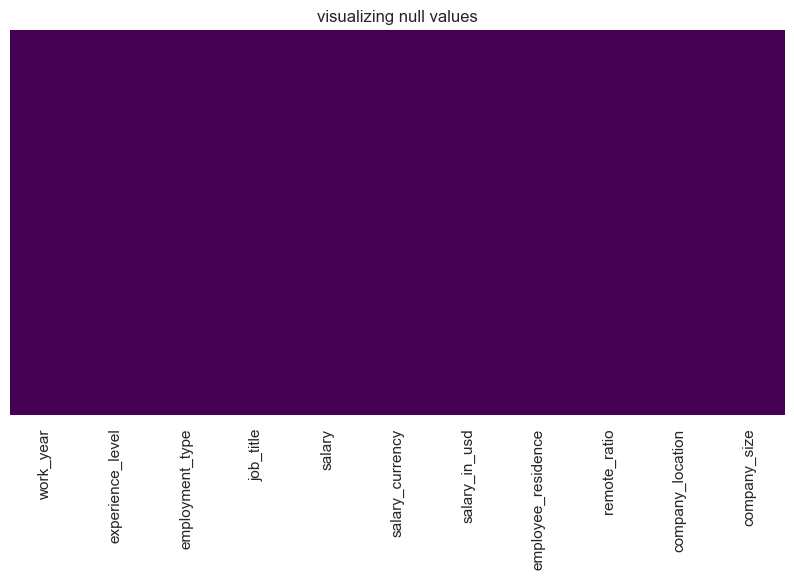

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df_salaries.isna() , cmap='viridis' , yticklabels=False , cbar=False)
plt.title('visualizing null values')
plt.show()

In [15]:
df_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [16]:
df_salaries.shape

(607, 11)

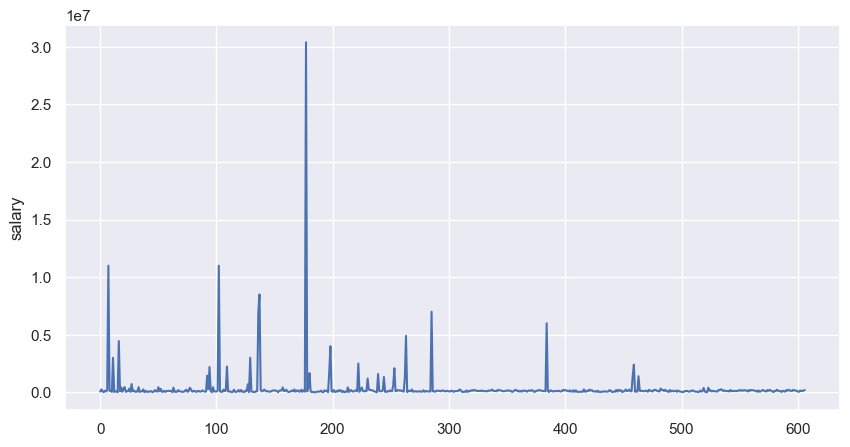

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(df_salaries.salary)
plt.show()

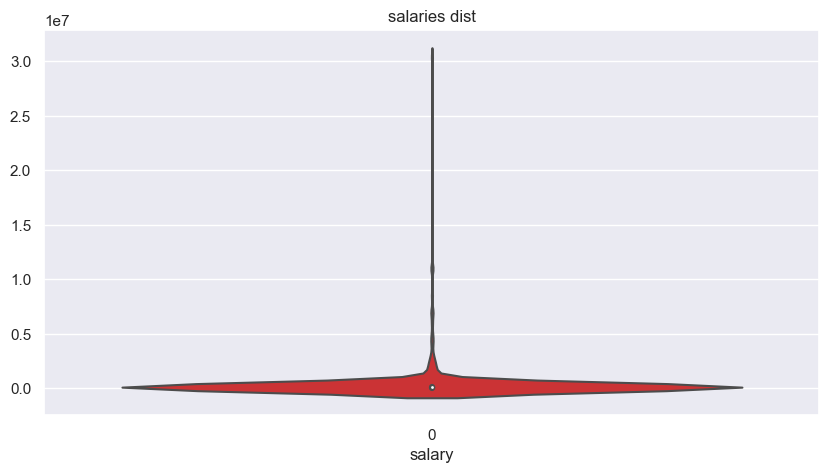

In [18]:
plt.figure(figsize = (10,5))
sns.violinplot(df_salaries.salary , palette='Set1')
plt.title('salaries dist')
plt.xlabel('salary')
plt.show()

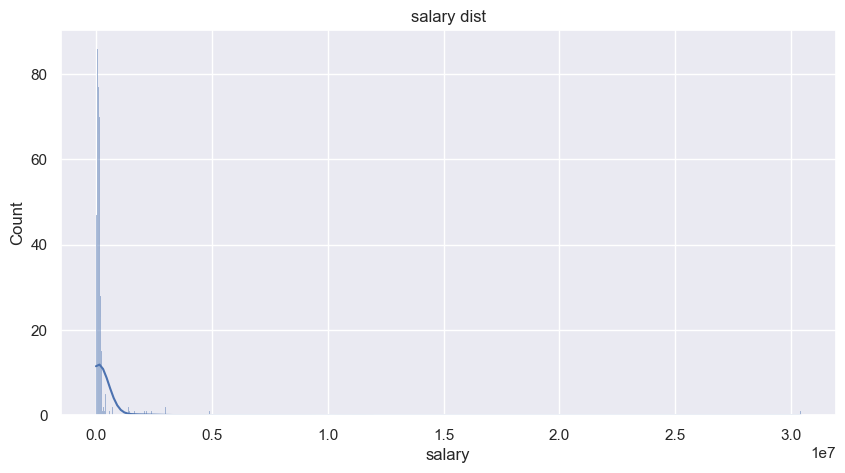

In [19]:
plt.figure(figsize = (10,5))
sns.histplot(df_salaries.salary , kde=True)
plt.title('salary dist')
plt.show()

# Data Visualization and insights

In [21]:
df_salaries.work_year.unique()

array([2020, 2021, 2022], dtype=int64)

so this data is only over 3 years period

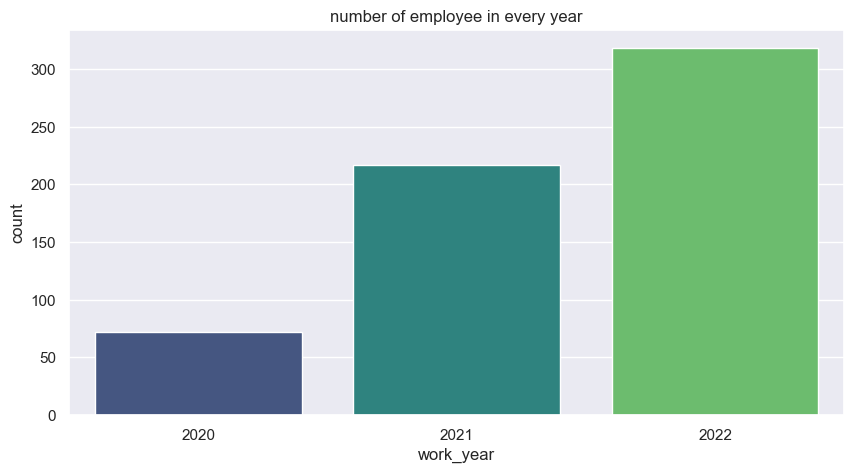

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_salaries , x = 'work_year' , palette='viridis')
plt.title('number of employee in every year')
plt.show()

 we notice that the number of employee is increasing

In [25]:
df_salaries.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

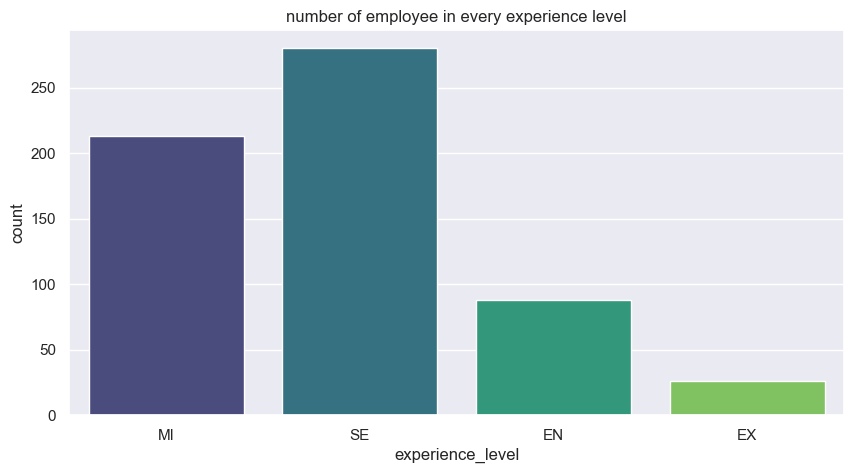

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_salaries , x = 'experience_level' , palette='viridis')
plt.title('number of employee in every experience level')
plt.show()

In [27]:
df_salaries.experience_level.value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [28]:
df_salaries.employment_type.value_counts()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

we notice that most of the employees is full time 

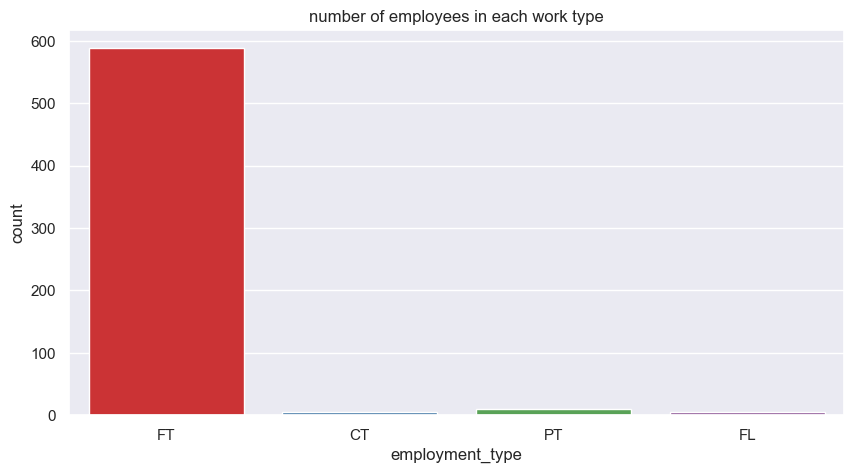

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_salaries , x = 'employment_type' , palette='Set1')
plt.title('number of employees in each work type')
plt.show()

In [31]:
df_salaries.job_title.nunique()

50

we have 50 different job titles

In [33]:
df_salaries.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

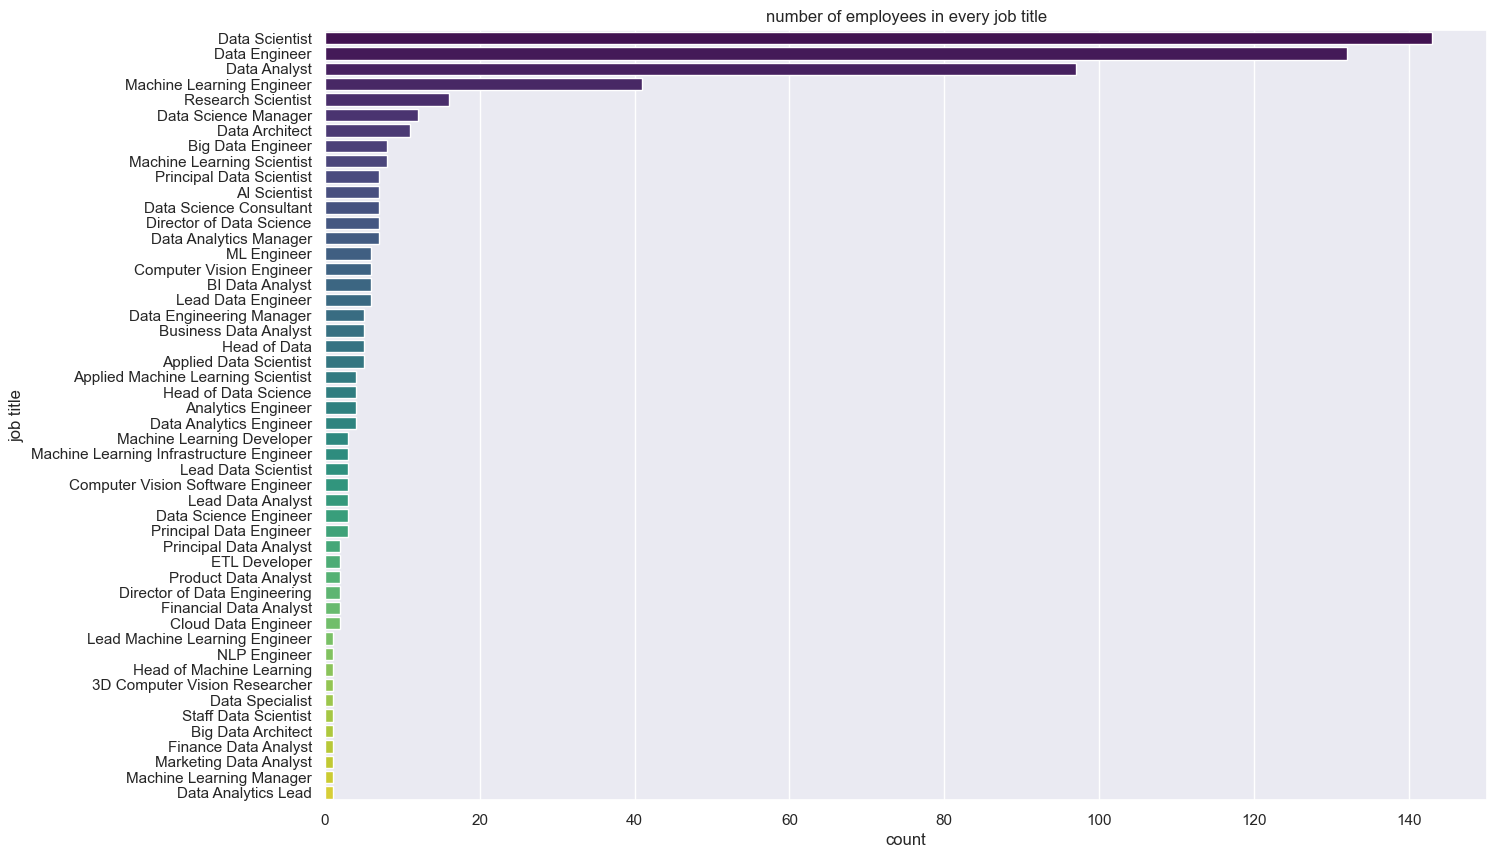

In [34]:
plt.figure(figsize = (15,10))
sns.barplot(data=pd.DataFrame(df_salaries.job_title.value_counts()).reset_index() , x='count', y = 'job_title' , orient='h' , palette="viridis" )
plt.title('number of employees in every job title')
plt.xlabel('count')
plt.ylabel('job title')
plt.show()

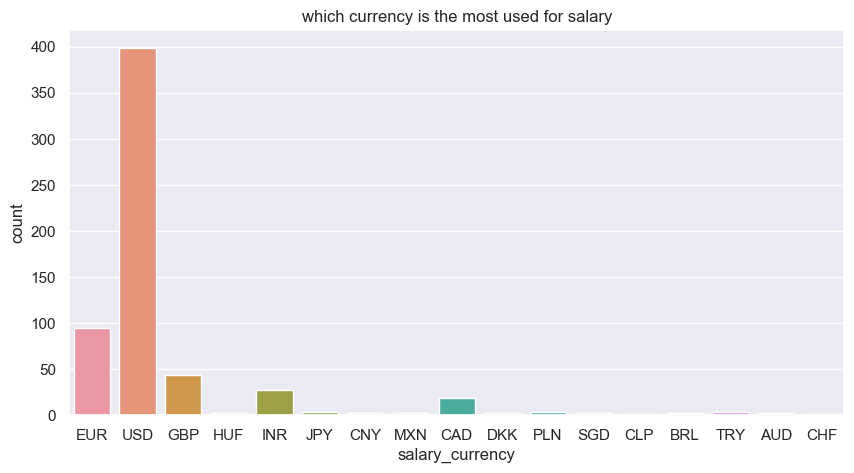

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_salaries , x = 'salary_currency')
plt.title('which currency is the most used for salary')
plt.show()

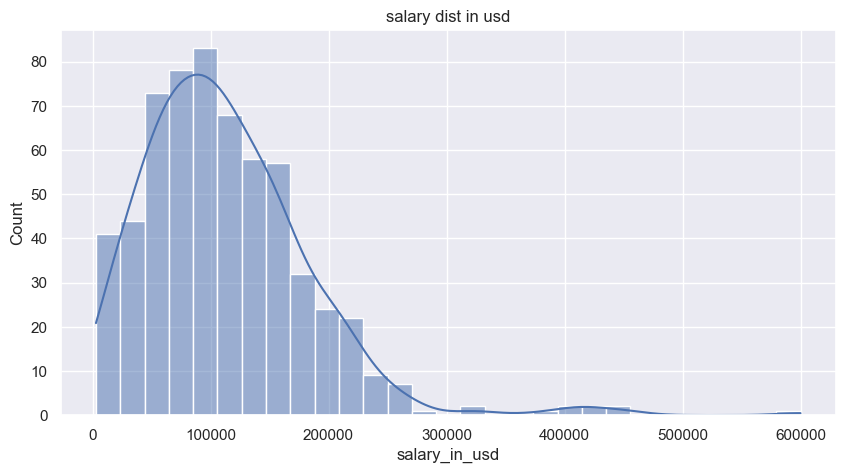

In [87]:
plt.figure(figsize=(10,5))
sns.histplot(data = df_salaries , x = "salary_in_usd" , kde= True  )
plt.title('salary dist in usd')
plt.show()

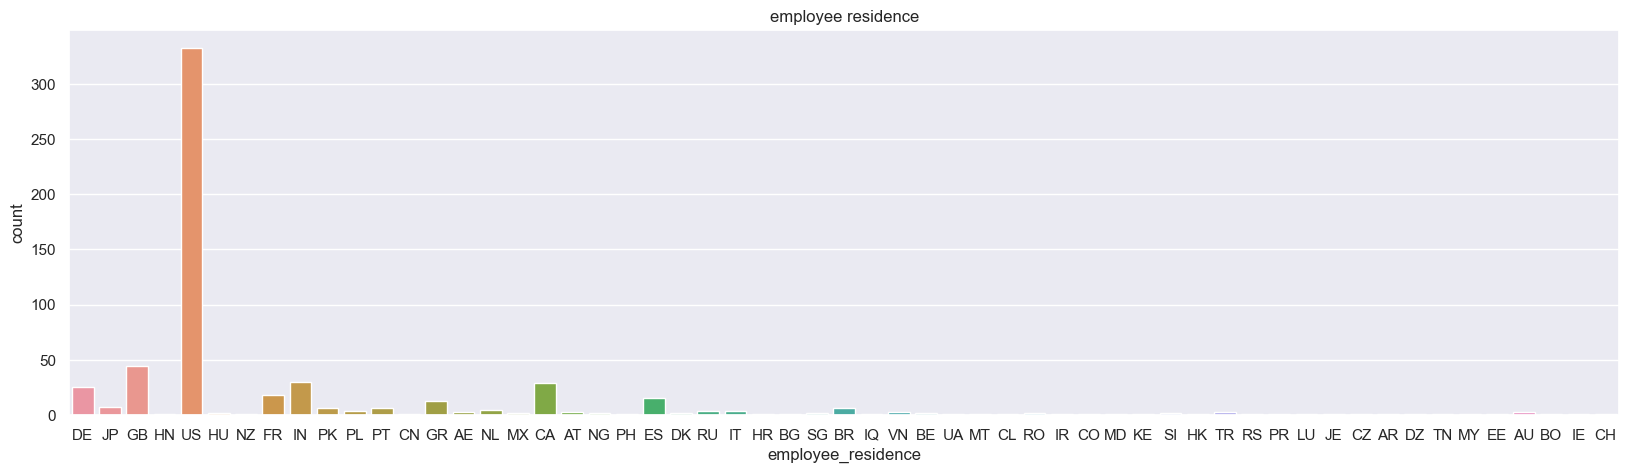

In [89]:
plt.figure(figsize=(20,5))
sns.countplot(data = df_salaries , x = 'employee_residence')
plt.title('employee residence')
plt.show()

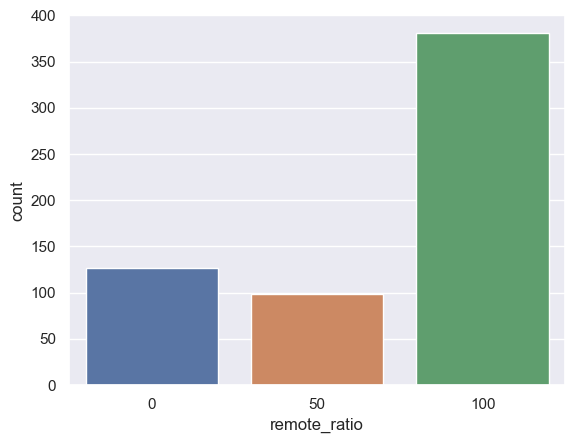

In [38]:
sns.countplot(data = df_salaries , x = 'remote_ratio')
plt.show()

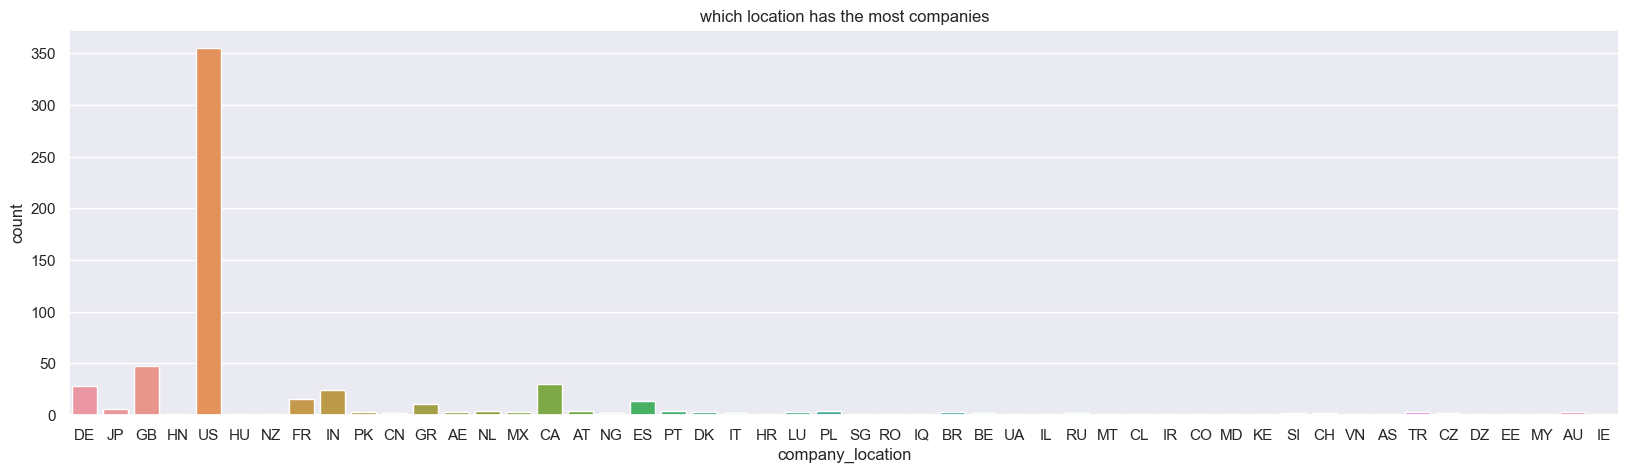

In [93]:
plt.figure(figsize = (20,5))
sns.countplot(data = df_salaries , x = 'company_location')
plt.title('which location has the most companies')
plt.show()

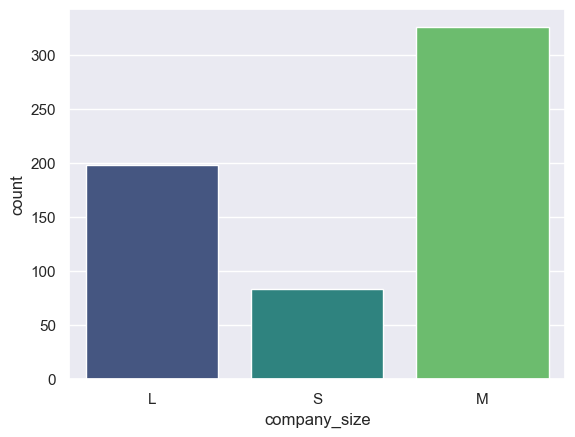

In [40]:
sns.countplot(data = df_salaries , x = 'company_size' , palette=  'viridis')
plt.show()

<Axes: xlabel='employment_type', ylabel='count'>

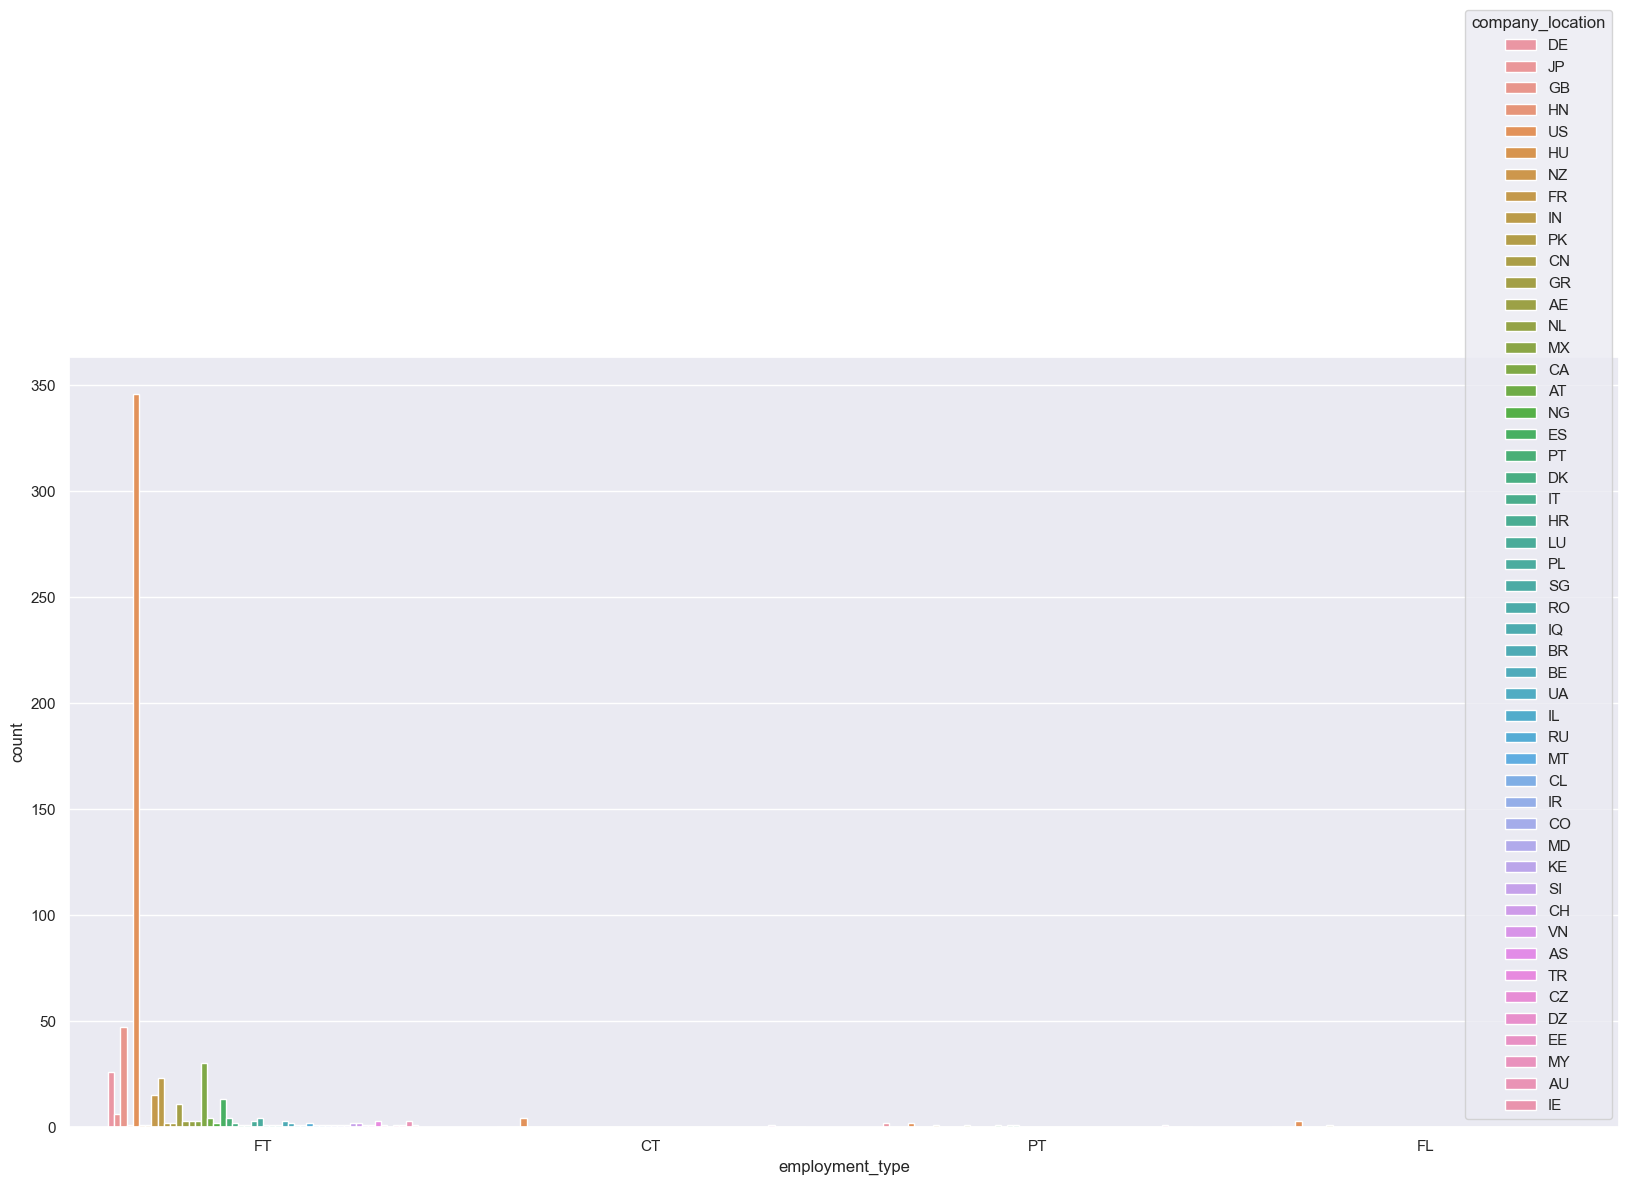

In [41]:
plt.figure(figsize = (20,10))
sns.countplot(data = df_salaries , x = 'employment_type' , hue = 'company_location' , )

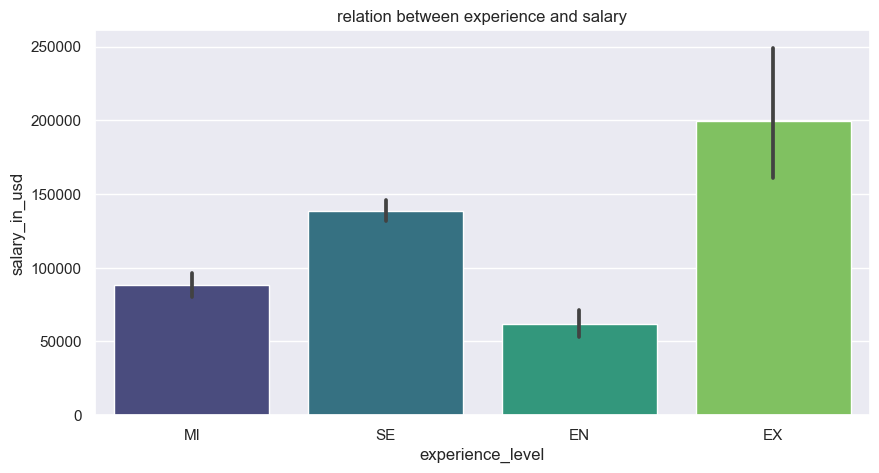

In [109]:
plt.figure(figsize = (10,5))
sns.barplot(data = df_salaries , x = 'experience_level' , y= 'salary_in_usd' , palette='viridis')
plt.title('relation between experience and salary')
plt.show()

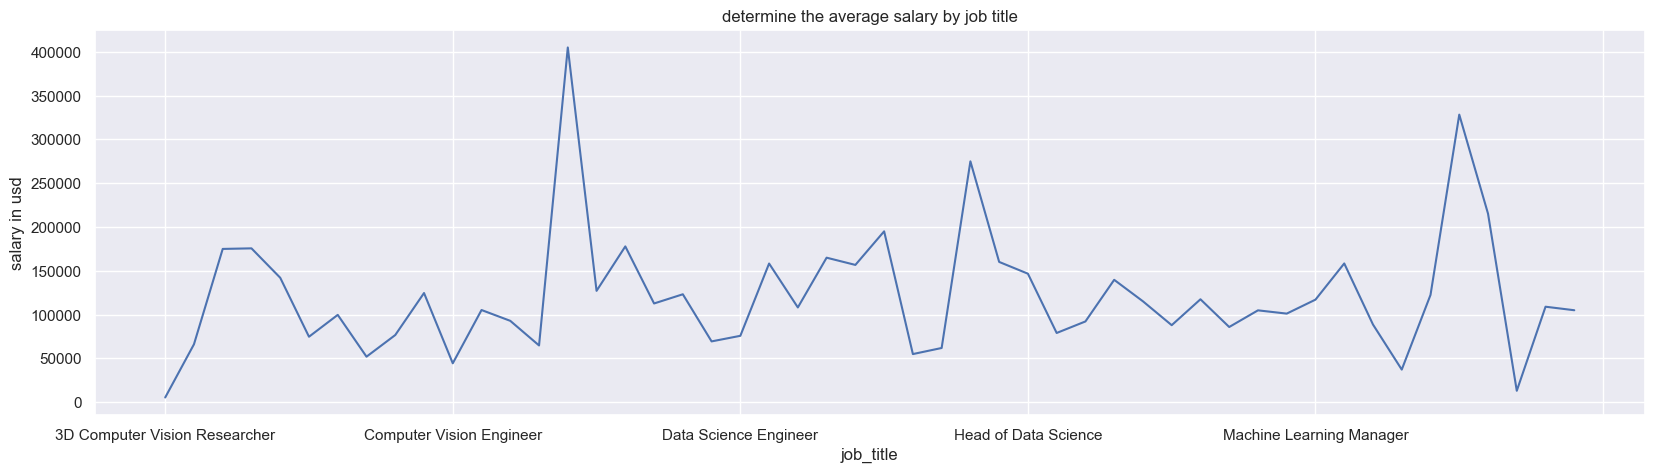

In [187]:
plt.figure(figsize=(20,5))
df_salaries.groupby(by='job_title')['salary_in_usd'].mean().plot()
plt.title('determine the average salary by job title')
plt.ylabel('salary in usd')
plt.show()

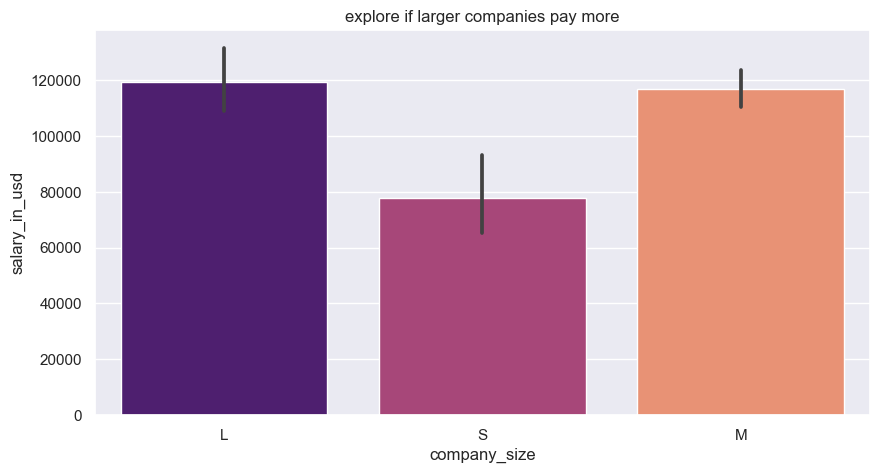

In [185]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_salaries , x ='company_size' , y = 'salary_in_usd' ,palette='magma')
plt.title('explore if larger companies pay more')
plt.show()

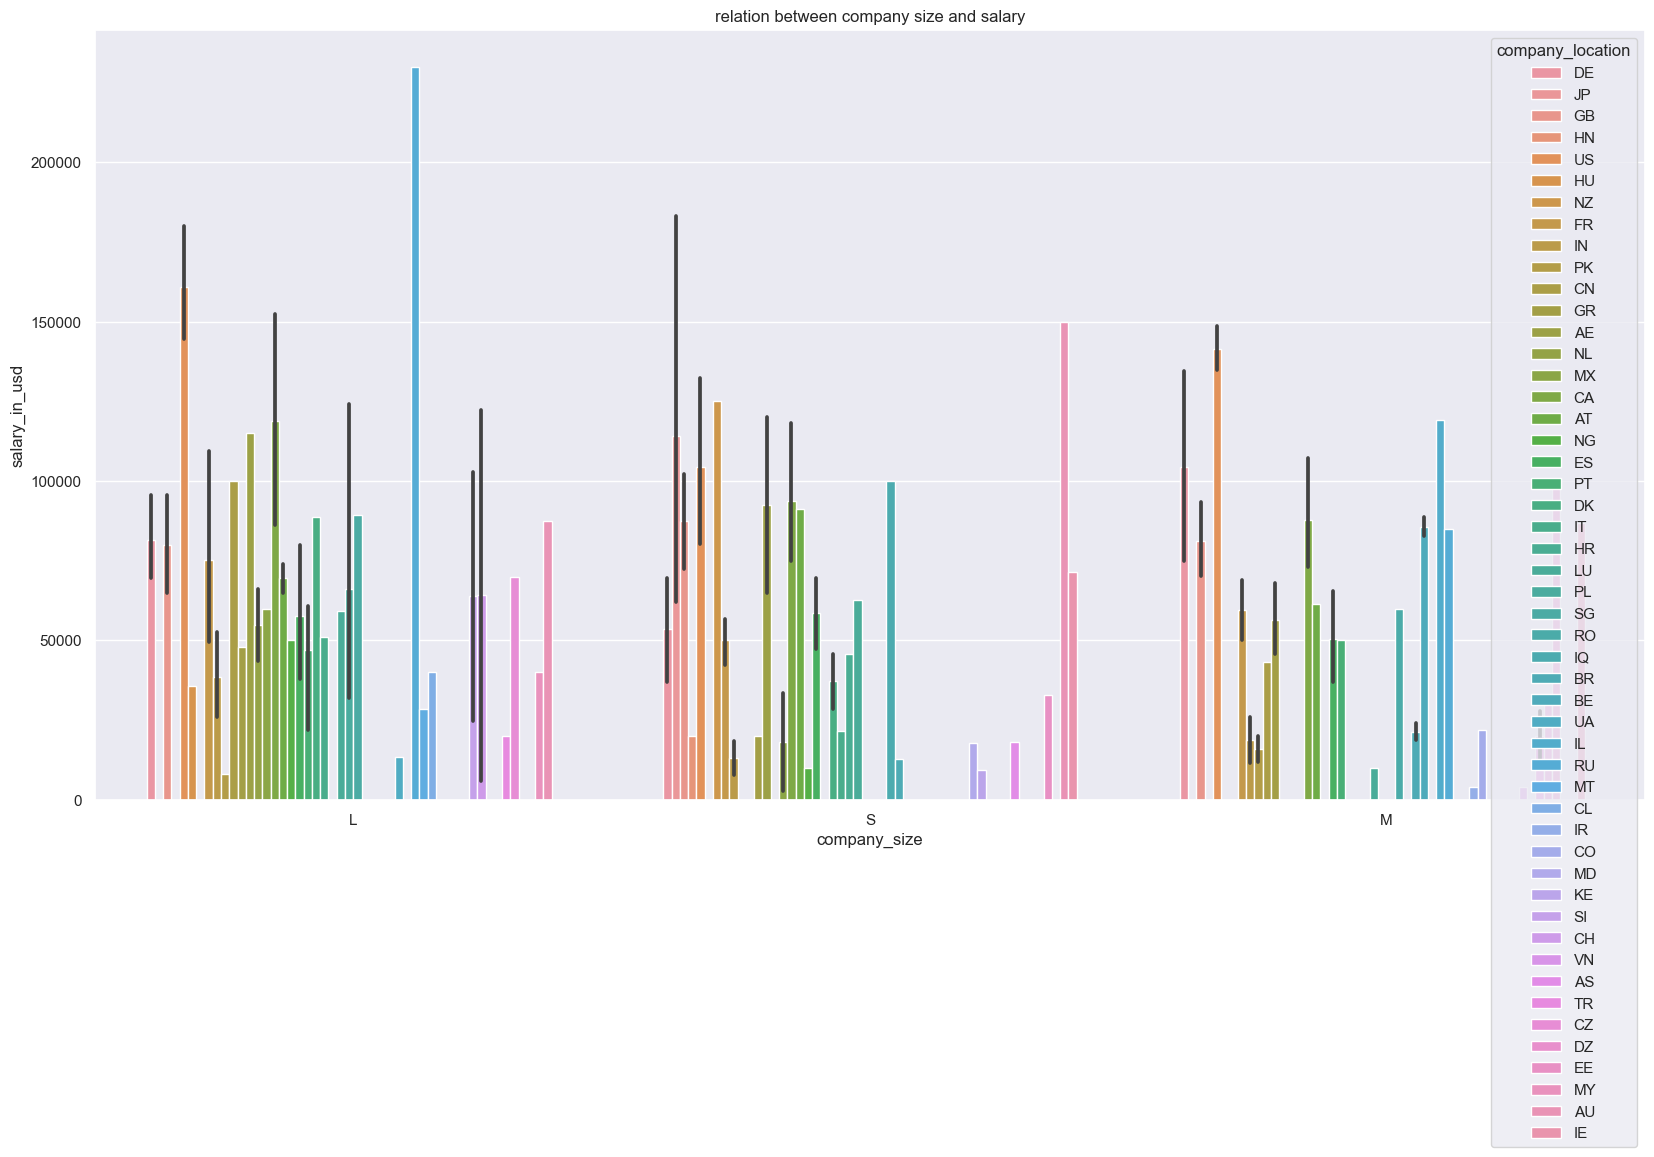

In [145]:
plt.figure(figsize=(20,10))
sns.barplot(data = df_salaries , x ='company_size' , y = 'salary_in_usd'  , hue= 'company_location')
plt.title('relation between company size and salary')
plt.show()

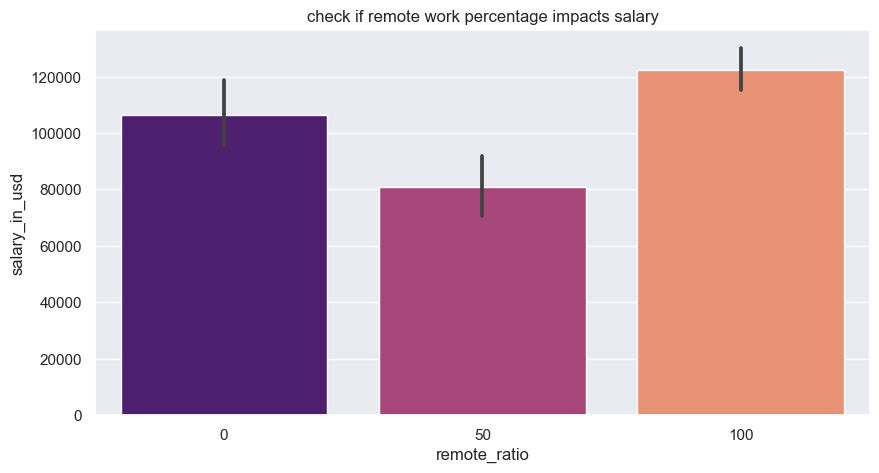

In [183]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_salaries , x = 'remote_ratio' , y ='salary_in_usd' , palette='magma')
plt.title('check if remote work percentage impacts salary')
plt.show()

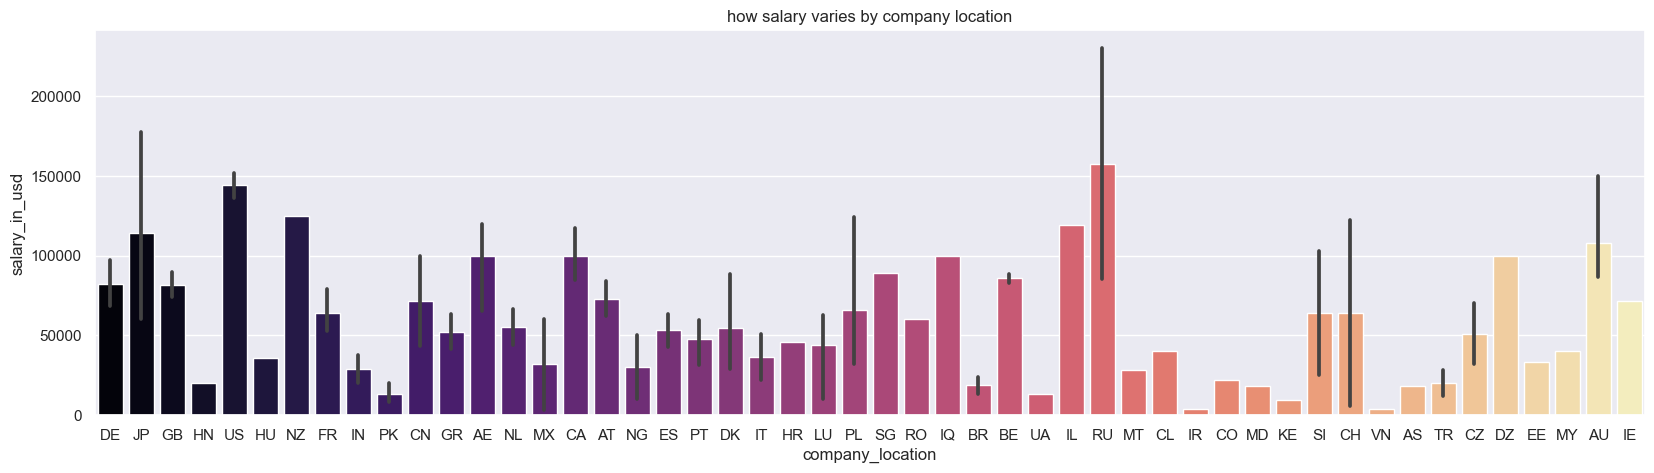

In [173]:
plt.figure(figsize=(20,5))
sns.barplot(data = df_salaries , x = 'company_location' , y ='salary_in_usd' , palette='magma' )
plt.title('how salary varies by company location')
plt.show()